Ce cahier numérique est à disposition sous licence CC-BY-NC-SA. Il a été écrit par Martin Vérot pour les étudiants en L3 de l'ENS de Lyon au sein du département Sciences de la matière. Cette activité vient en complément du [polycopié de cours](http://agregationchimie.free.fr/cours.php#incertitudes). 

# Test du $\chi^2$ pour une distribution de référence gaussienne



## Méthode manuelle


In [1]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib as mpl
import matplotlib.pyplot as plt


#données brutes de fréquence, 
#points = np.array([4.09103818,3.02194875,0.78321503,4.02915259,5.45048451,2.23555475,2.17591535,3.50001219,5.98314423,8.8028091,1.22918136,-0.01684076,4.93638838,7.18948016,9.0932071,4.12320538,4.86971359,6.95918317,1.2552251,5.64795593,4.23209031,4.25888762,6.83942203,3.39148651,3.47976516,6.29018804,0.48260481,3.47686298,3.45759942,6.16456364,8.9349125,1.4420946,2.99003878,5.42082261,4.57269482,2.98832944,4.67272616,2.98739452,4.49259559,9.90984723,6.96415923,5.36929635,2.7293919,4.66203536,2.64775647,8.87240237,6.30605069,6.50201109,2.39230962,5.51596779,0.70530252,3.17465907,2.68131671,5.36521025,5.92566587,0.89783134,3.18456691,6.48096112,6.40979612,2.83133677,6.53083066,7.04741883,2.24684749,5.39761458,6.19104369,6.36365539,-2.51763445,5.56591087,3.0324807,4.55373214,-0.73427012,3.06480097,2.50739215,0.74973187,7.44781215,3.04030983,4.93152161,3.12641811,6.64276168,3.91788357,1.92661847,5.15663086,0.10524237,5.15516628,-1.61149605,-1.46530829,5.4065252,-2.84383719,4.60036336,4.68578745,0.26558263,3.9552589,1.97197017,0.57656924,5.94523572,2.61649978,6.09353098,7.47412574,1.71979702,3.91519253,7.16813527,11.15485289,-0.8042101,4.34629202,3.4763488,7.12361978,5.21664921,1.80574113,2.29599786,5.35316212,3.4015665,6.88247979,3.29509137,-3.61920516,2.71882706,2.35996694,7.68067008,2.71113298,4.55341632,4.00524357,1.33390939,4.13467272,4.29253895,2.02187451,1.23438183,0.46779898,-0.96946099,4.27917796,-0.02177292,7.3444623,2.45595622,7.33067059,5.11556594,2.55236448,4.40905096,5.45500698,7.33553384,3.77619152,4.75075875,-1.83367147,1.66971158,2.71214024,0.91826903,2.08870366,6.29690236,3.89505328,4.88500199,5.66401861,-0.97304853,11.47414676,0.5779342,4.40448239,-0.21475369,4.10059894,4.54577289,4.22731863,1.24466991,7.81967977,9.84882085,8.87083586,5.79248509,6.6954462,7.80974587,-2.89504068,5.39406494,7.02702265,1.3902143,2.44121586,4.51176449,0.45215783,6.73433881,7.8308329,7.47222386,5.16156276,0.72946302,-0.21111726,11.91470395,0.63387378,3.14022092,7.79560061,7.18167333,1.76681088,5.51571751,5.90294348,4.72520448,7.75833922,8.70806485,-1.50679485,-1.90387591,2.54486204,6.81611361,6.52283719,8.71715153,1.75660914,0.39117488,5.76254073,7.54857595,3.44473582,8.58594904,5.2295392])
#points = scipy.stats.uniform.rvs(loc=0,scale=1,size=200)
#points = scipy.stats.norm.rvs(loc=0,scale=1,size=1000000)
#points = scipy.stats.gamma.rvs(2,loc=0.5-np.sqrt(2),scale=1/np.sqrt(2),size=2000)
points = scipy.stats.norm.rvs(loc=0,scale=1,size=2000)+scipy.stats.norm.rvs(loc=0,scale=1,size=2000)

#calcul du nombre total de mesures
n = np.size(points)
print('nb de mesures {}'.format(n))
#étape 1: on calcule la moyenne et l'écart-type de l'échantillon
z0=np.average(points)
sigma = np.std(points,ddof=1)
print('moyenne : {} écart-type : {}'.format(z0,sigma))
    
#étape 2 : inutile ici car tout est automatique
#étape 3 : on calcule le nombre de classes à avoirs : 
nbClasses1 = np.sqrt(n)
nbClasses2 = 1+3.3*np.log10(n)
nbBins = int(np.min([np.floor(nbClasses2),np.floor(nbClasses1)]))
print('nombre de classes, \n méthode 1 : {:.2f} méthode 2 : {:.2f}, retenu : {}'.format(nbClasses1,nbClasses2,nbBins))

nb de mesures 2000
moyenne : 0.020385895849074877 écart-type : 1.4250128746325574
nombre de classes, 
 méthode 1 : 44.72 méthode 2 : 11.89, retenu : 11


In [2]:
#étape 4 : calcul de l'histogramme

bins,ranges = np.histogram(points,bins=nbBins)
print(bins)
print(ranges)

##On vérifie que toutes les classes ont au moins 5 éléments
if bins[bins<5].sum()>1:
    print('Attention, au moins une des classes à moins de 5 éléments. il faut peut être réduire le nombre de classes et fusionner des intervalles')


"""
Code pour fusionner les classes ayant moins de 5 éléments,
    pour la première moitié du tableau, on fusionne avec la colonne de droite
    pour la deuxième moitié du tableau, on fusionne avec la colonne de gauche
"""

#on répète la fusion jusqu'à ce qu'il n'y ait plus d'intervalle avec moins de 5 éléments
while np.sum(bins<5)>0:
    #récupérer tous les indices des corbeilles avec moins de 5 éléments    
    indices = np.where(bins<5)
    indices = np.array(*indices)
    #print(indices)
    #Indices de la moitié gauche du tableau
    lindices= np.squeeze(np.take(indices,np.where(indices <= ranges.size//2)),axis=0)
    #indices de la moitié droit du tableau
    rindices= np.squeeze(np.take(indices,np.where(indices > ranges.size//2)),axis=0)
    #on fusionne les comptes des différents intervalles
    for indix in lindices:
        bins[indix]+=bins[indix+1]
    for indix in np.flip(rindices):#on corrige pour le faire de droite à gauche de proche en proche
        bins[indix-1]+=bins[indix]
    #on supprime les corbeilles fusionnées
    bins = np.delete(bins,lindices+1)
    bins = np.delete(bins,rindices-np.size(lindices))#ici, on doit prendre en compte d'avoir déjà supprimé certains indices
    #on supprime les bornes des intervalles correspondants
    ranges = np.delete(ranges,lindices+1)
    ranges = np.delete(ranges,rindices-np.size(lindices))
    print(bins)
    print(ranges)
#Mise à jour du nombre de corbeilles
nbBins = bins.size
if np.sum(bins) != n:
    print('erreur'.format(nbBins))
print('nombre de corbeilles après suppression {}'.format(nbBins))


[ 10  42 123 232 402 448 355 229 113  38   8]
[-4.34283161 -3.54193415 -2.74103668 -1.94013921 -1.13924175 -0.33834428
  0.46255319  1.26345065  2.06434812  2.86524559  3.66614305  4.46704052]
nombre de corbeilles après suppression 11


In [3]:
#étape 5 : calcul de la fréquence 
freqs = bins/n

#étape 6 : calcul de la fréquence théorique pour la distribution correspondant à celle indiquée
CheckDistrib = stats.norm

#calcul des fréquences théoriques non renormalisées 
theoretical1 = n*(CheckDistrib.cdf(ranges[1:],loc=z0,scale=sigma)-CheckDistrib.cdf(ranges[:-1],loc=z0,scale=sigma))
sum_theoretical = (stats.norm.cdf(np.max(ranges),loc=z0,scale=sigma)-stats.norm.cdf(np.min(ranges),loc=z0,scale=sigma))
#renormalisaton par le nombre d'observations théoriques dans l'intervalle des mesures effectuées
theoretical = theoretical1/sum_theoretical


print('fréquences obervées')
print(bins)

print('fréquences théoriques renormalisées')
print(theoretical)

fréquences obervées
[ 10  42 123 232 402 448 355 229 113  38   8]
fréquences théoriques renormalisées
[ 10.24554842  40.30099327 116.4736414  247.38899897 386.23817613
 443.30396292 374.05475088 232.02604555 105.79212742  35.44872595
   8.7270291 ]


valeur de chi^2 : 3.8388580533513914
valeur seuil : 15.50731305586545
À priori, les deux valeurs concordent.


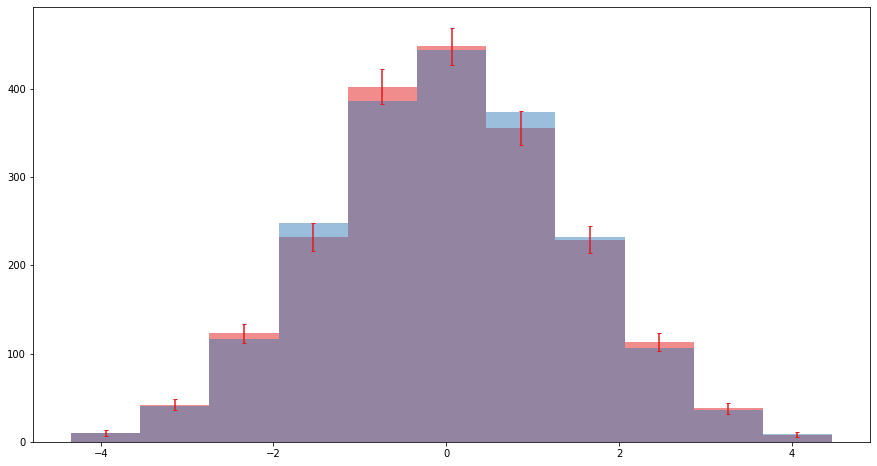

In [4]:
seuil = 0.05

#étape 7 : calcul du chi^2
# Méthode 1 
#calcul des sigma_i
sigs = np.sqrt(theoretical)
chi2 = np.sum( ((bins-theoretical)/sigs)**2)
# Méthode 2
chi2 = np.sum( (bins-theoretical)**2/theoretical)
print('valeur de chi^2 : {}'.format(chi2))


#étape 8 : Calcul du nombre de degré de liberté, ici, comme on a fixé le nombre total de mesures, 
# utilisé z0 et sigma pour déterminer la distribution théorique, il est égal à n-3
# si jamais la valeur de la moyenne et de l'écart-type attendu pour la distribution sont déjà 
#connus, alors nu = nbBins-1
nu = nbBins-3

#étape 9 : calcul de la valeur limite
chi2_theo = scipy.stats.chi2.ppf(1-seuil, df=nu)

print('valeur seuil : {}'.format(chi2_theo))

if chi2_theo<chi2:
    print('À priori, les deux valeurs ne concordent pas.')
else:
    print('À priori, les deux valeurs concordent.')

fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1, 1,hspace=0.25)
ax1 = fig.add_subplot(gs[0,0])
ax1.bar(ranges[:-1], bins, width=np.diff(ranges), align='edge',alpha=0.5,label='expérience',color='#e41a1c')
ax1.errorbar((ranges[:-1]+ranges[1:])/2,bins,yerr=sigs,capsize=2,ls='',color='#e41a1c')
ax1.bar(ranges[:-1], theoretical, width=np.diff(ranges), align='edge',alpha=0.5,label='théorie',color='#377eb8')
plt.show()

## Méthode plus automatique


In [5]:
chi2,p = stats.chisquare(bins, f_exp=theoretical,ddof=2)
#valeur de t_exp
print('chi2 {}'.format(chi2))
#probabilité d'affirmer par erreur qu'il n'y a pas égalité entre les valeurs mesurées et la valeur théorique
print('p {}'.format(p) ) 

if seuil>p:
    print('À priori, les deux valeurs ne concordent pas.')
else:
    print('À priori, les deux valeurs concordent.')

print('seuil critique qui changera la conclusion du test : {:.12f}'.format(p))


chi2 3.8388580533513914
p 0.871361622581087
À priori, les deux valeurs concordent.
seuil critique qui changera la conclusion du test : 0.871361622581


In [6]:
#calcul manuel de la valeur théorique de p donnant la valeur de chi2
p_manuel = 1-scipy.stats.chi2.cdf(chi2, df=nu)

#écart entre la valeur donnée par la fonction scipy.stats.ttest_1samp et la valeur calculée par recherche de zéro
print('p {} écart {}'.format(p_manuel,p-p_manuel))

p 0.871361622581087 écart 0.0
